In [1]:
import typing
import json
import glob

import numpy
import pandas 

import scipy
import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import seaborn

import llm_questionnaires as llmq

In [2]:
MODELS: typing.List[str] = llmq.CONSTANTS.MODELS
MODELS

['llama3.1-8b',
 'llama3.3-70b',
 'mistral-7b',
 'mistral-large-123b',
 'qwen2.5-7b',
 'qwen2.5-72b']

In [3]:
COLUMNS: typing.List[str] = [
    [str(quest["dimension"][:2].upper()) + str(quest["dimension"][4].upper()) + str(quest["id"]) for quest in
    json.load(open("../../../data/humor_styles/questionnaire.json"))[0]["questions"]]
]

In [4]:
raw: typing.Dict[str, pandas.DataFrame]= {
    **llmq.evaluation.read_populations("data/base", MODELS, COLUMNS),
    "human_full": (
        pandas.read_csv("../../../data/humor_styles/survey.csv")
        .rename_axis(index="participant")
        .filter(like='Q', axis=1)
        .replace(-1, None)
        .apply(pandas.to_numeric)
        .set_axis(COLUMNS, axis=1)
    ),
    "random": (
        pandas.DataFrame(numpy.random.randint(0,5, (1000, 32)), columns=range(1,33))
        .rename_axis(index="participant")
        .set_axis(COLUMNS, axis=1)
    )
}

raw.keys()

dict_keys(['llama3.1-8b', 'llama3.3-70b', 'mistral-7b', 'mistral-large-123b', 'qwen2.5-7b', 'qwen2.5-72b', 'human_full', 'random'])

In [5]:
for key, values in raw.items():
    values.to_csv(f"reports/raw.{key}.csv", index=False)

In [6]:
descriptive = pandas.concat({
    key: statsmodels.stats.descriptivestats.describe(values).T
    for key, values in raw.items()
})
descriptive

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)


nobs  missing      mean   std_err  upper_ci  lower_ci  \
llama3.1-8b AFL1   1000.0     16.0  2.311992  0.037293  2.385084  2.238900   
            SEE2   1000.0     24.0  1.710041  0.034868  1.778381  1.641701   
            AGE3   1000.0     20.0  3.666327  0.037371  3.739572  3.593082   
            SED4   1000.0     17.0  3.174975  0.048407  3.269850  3.080099   
            AFL5   1000.0     14.0  3.193712  0.053732  3.299025  3.088399   
...                   ...      ...       ...       ...       ...       ...   
random      SED28  1000.0      0.0  1.948000  0.044467  2.035153  1.860847   
            AFL29  1000.0      0.0  1.979000  0.044028  2.065294  1.892706   
            SEE30  1000.0      0.0  2.031000  0.044430  2.118081  1.943919   
            AGE31  1000.0      0.0  2.049000  0.045196  2.137582  1.960418   
            SED32  1000.0      0.0  1.994000  0.044203  2.080637  1.907363   

                        std  iqr  iqr_normal       mad  ...  median   1%   5%  \
llama3.1-8b AFL1   1.169822  2.0    1.482602  0.964412  ...     2.0  1.0  1.0   
            SEE2   1.089315  1.0    0.741301  0.832261  ...     1.0  1.0  1.0   
            AGE3   1.169885  2.0    1.482602  0.965737  ...     4.0  1.0  1.0   
            SED4   1.517684  3.0    2.223903  1.364014  ...     4.0  1.0  1.0   
            AFL5   1.687217  4.0    2.965204  1.544507  ...     3.0  1.0  1.0   
...                     ...  ...         ...       ...  ...     ...  ...  ...   
random      SED28  1.406155  2.0    1.482602  1.200296  ...     2.0  0.0  0.0   
            AFL29  1.392299  2.0    1.482602  1.179200  ...     2.0  0.0  0.0   
            SEE30  1.404996  2.0    1.482602  1.193076  ...     2.0  0.0  0.0   
            AGE31  1.429210  2.0    1.482602  1.217232  ...     2.0  0.0  0.0   
            SED32  1.397826  2.0    1.482602  1.179200  ...     2.0  0.0  0.0   

                   10%  25%  50%  75%  90%  95%  99%  
llama3.1-8b AFL1   1.0  1.0  2.0  3.0  4.0  5.0  5.0  
            SEE2   1.0  1.0  1.0  2.0  3.0  5.0  5.0  
            AGE3   2.0  3.0  4.0  5.0  5.0  5.0  5.0  
            SED4   1.0  2.0  4.0  5.0  5.0  5.0  5.0  
            AFL5   1.0  1.0  3.0  5.0  5.0  5.0  5.0  
...                ...  ...  ...  ...  ...  ...  ...  
random      SED28  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            AFL29  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            SEE30  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            AGE31  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            SED32  0.0  1.0  2.0  3.0  4.0  4.0  4.0  

[256 rows x 31 columns]

In [7]:
raw["human_sampled"] = (
    pandas.DataFrame(numpy.stack([
        numpy.random.normal(row["mean"], row["std"], 1000).astype(int)
        for _, row in descriptive.loc["human_full"][["mean", "std"]].iterrows()
    ], axis=1), columns=range(1,33))
    .rename_axis(index="participant")
    .set_axis(COLUMNS, axis=1)
)

In [8]:
pandas.concat({
    (key_1, key_2): (
        pandas.Series(
            scipy
            .stats.f_oneway(
                values_1,
                values_2,
                nan_policy="omit"
            )
            .pvalue
            > 0.05,
            name="f_oneway_significant"
        )
        .value_counts()
    )
    for key_1, values_1 in raw.items()
    for key_2, values_2 in raw.items()
}).to_frame()

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:618: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


count
                            f_oneway_significant       
llama3.1-8b   llama3.1-8b   True                     22
                            False                    10
              llama3.3-70b  False                    31
                            True                      1
              mistral-7b    False                    21
...                                                 ...
human_sampled qwen2.5-72b   False                    32
              human_full    False                    32
              random        False                    28
                            True                      4
              human_sampled True                     32

[146 rows x 1 columns]

In [9]:
sim: pandas.DataFrame = (
    llmq.evaluation.apply_calc_similarity(raw)
    .to_frame()
    .reset_index(level=[0, 1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .reindex(
        columns=(idx := ["random", "human_sampled", "human_full", *MODELS]),
        index=idx
    )
    .pipe(llmq.evaluation.extract_triu_df)
)
sim

print(sim.pipe(llmq.evaluation.format_latex_df))
print({
    "mean": sim.stack().mean(),
    "std": sim.stack().std()
})

\begin{tabular}{lrrrrrrrrr}
\toprule
level_1 & \rotatebox{65}{random} & \rotatebox{65}{human\_sampled} & \rotatebox{65}{human\_full} & \rotatebox{65}{llama3.1-8b} & \rotatebox{65}{llama3.3-70b} & \rotatebox{65}{mistral-7b} & \rotatebox{65}{mistral-large-123b} & \rotatebox{65}{qwen2.5-7b} & \rotatebox{65}{qwen2.5-72b} \\
level_0 &  &  &  &  &  &  &  &  &  \\
\midrule
random &  &  &  &  &  &  &  &  &  \\
human\_sampled & 0.034 &  &  &  &  &  &  &  &  \\
human\_full & 0.002 & -0.036 &  &  &  &  &  &  &  \\
llama3.1-8b & 0.029 & -0.016 & 0.044 &  &  &  &  &  &  \\
llama3.3-70b & -0.033 & 0.069 & -0.003 & -0.024 &  &  &  &  &  \\
mistral-7b & 0.019 & -0.003 & 0.232 & 0.000 & 0.023 &  &  &  &  \\
mistral-large-123b & 0.038 & 0.009 & 0.428 & -0.013 & -0.022 & 0.117 &  &  &  \\
qwen2.5-7b & -0.041 & -0.032 & 0.308 & -0.028 & -0.054 & 0.032 & 0.335 &  &  \\
qwen2.5-72b & -0.068 & -0.036 & 0.216 & -0.004 & 0.032 & 0.044 & 0.084 & 0.139 &  \\
\bottomrule
\end{tabular}

{'mean': np.float64(0.05057

In [10]:
sim.mean()

level_1
random               -0.002616
human_sampled        -0.006465
human_full            0.204176
llama3.1-8b          -0.013592
llama3.3-70b         -0.005372
mistral-7b            0.064478
mistral-large-123b    0.209453
qwen2.5-7b            0.139042
qwen2.5-72b                NaN
dtype: float64

In [11]:
(
    sim
    .filter(like="human")
    .stack()
    .mean()
)

np.float64(0.09075389413539722)

<Axes: xlabel='level_1', ylabel='level_0'>

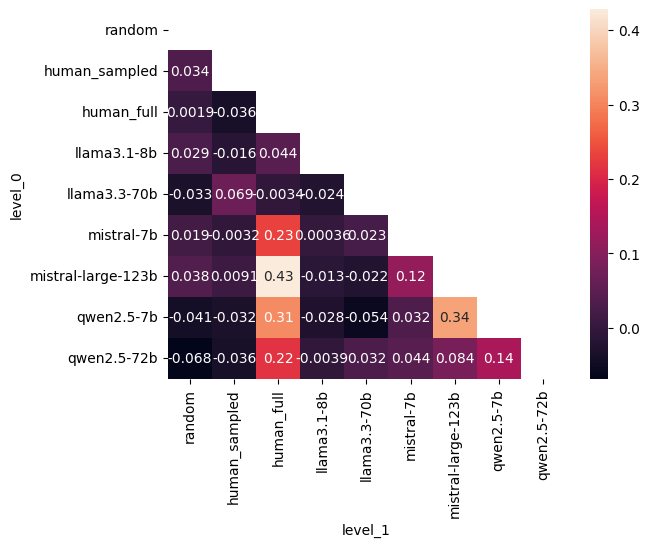

In [12]:
seaborn.heatmap(sim, annot=True, mask=numpy.triu(sim))

In [13]:
human_chunked = {
    f"{n:02d}": chunk
    for n, chunk in enumerate(numpy.array_split(raw["human_full"].sample(frac=1.0), 10), start=1)
}

sim = (
    llmq.evaluation.apply_calc_similarity(human_chunked)
    .to_frame()
    .reset_index(level=[0,1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .pipe(llmq.evaluation.extract_triu_df)
    
)
sim

print(sim.pipe(llmq.evaluation.format_latex_df))
print({
    "mean": sim.stack().mean(),
    "std": sim.stack().std()
})

\begin{tabular}{lrrrrrrrrrr}
\toprule
level_1 & \rotatebox{65}{01} & \rotatebox{65}{02} & \rotatebox{65}{03} & \rotatebox{65}{04} & \rotatebox{65}{05} & \rotatebox{65}{06} & \rotatebox{65}{07} & \rotatebox{65}{08} & \rotatebox{65}{09} & \rotatebox{65}{10} \\
level_0 &  &  &  &  &  &  &  &  &  &  \\
\midrule
01 &  &  &  &  &  &  &  &  &  &  \\
02 & 0.839 &  &  &  &  &  &  &  &  &  \\
03 & 0.840 & 0.796 &  &  &  &  &  &  &  &  \\
04 & 0.849 & 0.842 & 0.829 &  &  &  &  &  &  &  \\
05 & 0.838 & 0.851 & 0.824 & 0.855 &  &  &  &  &  &  \\
06 & 0.845 & 0.832 & 0.800 & 0.798 & 0.821 &  &  &  &  &  \\
07 & 0.842 & 0.841 & 0.815 & 0.879 & 0.850 & 0.813 &  &  &  &  \\
08 & 0.838 & 0.835 & 0.819 & 0.843 & 0.826 & 0.836 & 0.847 &  &  &  \\
09 & 0.847 & 0.829 & 0.849 & 0.874 & 0.859 & 0.826 & 0.862 & 0.856 &  &  \\
10 & 0.860 & 0.783 & 0.803 & 0.813 & 0.776 & 0.813 & 0.797 & 0.818 & 0.815 &  \\
\bottomrule
\end{tabular}

{'mean': np.float64(0.8316173465559705), 'std': np.float64(0.022988430528701517

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
